# Introduction

We will be performing a data analysis on the NCSES survey to determine if demographic factors and/or COVID-19 had an effect on the employment of various college graduates employment.

## Major imports

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Reading in csv data

In [20]:
df = pd.read_csv(filepath_or_buffer='ncses_table_srv_data_NSCG_2024-11-11T22_02_16Z\\ncses_table_raw_data_NSCG_2024-11-11T22_02_16Z.csv',thousands=',')
df.dropna(how='all',axis='index')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Year                                                2580 non-null   int64 
 1   Labor force status                                  2580 non-null   object
 2   Race (2003-2021)                                    2580 non-null   object
 3   Gender                                              2580 non-null   object
 4   Field of maj - most recent deg (major) (2003-2021)  2580 non-null   object
 5   Age group (5 year intv)                             2580 non-null   object
 6   Weighted Count                                      2580 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 141.2+ KB


Labels for data include Year, LFS, Race, Gender, Field of Maj, and the Weighted Count.

In [21]:
#Saving old frame just in case
df_old = df
races = df['Race (2003-2021)'].unique()
df = df.replace(to_replace=races, value= list(range(0, len(races))))
df

C:\Users\pauli\AppData\Local\Temp\ipykernel_55484\2632857430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace=races, value= list(range(0, len(races))))


,Year,Labor force status,Race (2003-2021),Gender,Field of maj - most recent deg (major) (2003-2021),Age group (5 year intv),Weighted Count
0,2021,Employed,0,Female,Computer and mathematical sciences,Ages 24 or younger,21198
1,2021,Employed,0,Female,Computer and mathematical sciences,Ages 25-29,42798
2,2021,Employed,0,Female,Computer and mathematical sciences,Ages 30-34,48353
3,2021,Employed,0,Female,Computer and mathematical sciences,Ages 35-39,32277
4,2021,Employed,0,Female,Computer and mathematical sciences,Ages 40-44,34064
...,...,...,...,...,...,...,...
2575,2019,Unemployed,5,Male,Non-S&E Fields,Ages 35-39,171
2576,2019,Unemployed,5,Male,Non-S&E Fields,Ages 40-44,13849
2577,2019,Unemployed,5,Male,Non-S&E Fields,Ages 45-49,9439
2578,2019,Unemployed,5,Male,Non-S&E Fields,Ages 50-54,1672


In [22]:
def toNum(dataf,column):
    lst = dataf[column].unique()
    dataf = dataf.replace(to_replace = lst, value= list(range(0,len(lst))))
    return dataf

In [23]:
columns = df.columns
columns = columns.drop(labels='Weighted Count',)
for x in columns:
    df = toNum(df,x)
columns

C:\Users\pauli\AppData\Local\Temp\ipykernel_55484\1756994110.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataf = dataf.replace(to_replace = lst, value= list(range(0,len(lst))))


Index(['Year', 'Labor force status', 'Race (2003-2021)', 'Gender',
       'Field of maj - most recent deg (major) (2003-2021)',
       'Age group (5 year intv)'],
      dtype='object')

## EDA for dataset

In [33]:
df.describe()

,Year,Labor force status,Race (2003-2021),Gender,Field of maj - most recent deg (major) (2003-2021),Age group (5 year intv),Weighted Count
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03
mean,0.478682,0.367442,2.346124,0.514729,3.162403,4.762016,4.150441e+04
std,0.499642,0.482202,1.697101,0.499880,2.023989,3.038456,1.516829e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,6.530000e+02
50%,0.000000,0.000000,2.000000,1.000000,3.000000,5.000000,3.555000e+03
75%,1.000000,1.000000,3.000000,1.000000,5.000000,7.000000,1.941925e+04
max,1.000000,1.000000,5.000000,1.000000,6.000000,10.000000,1.599662e+06


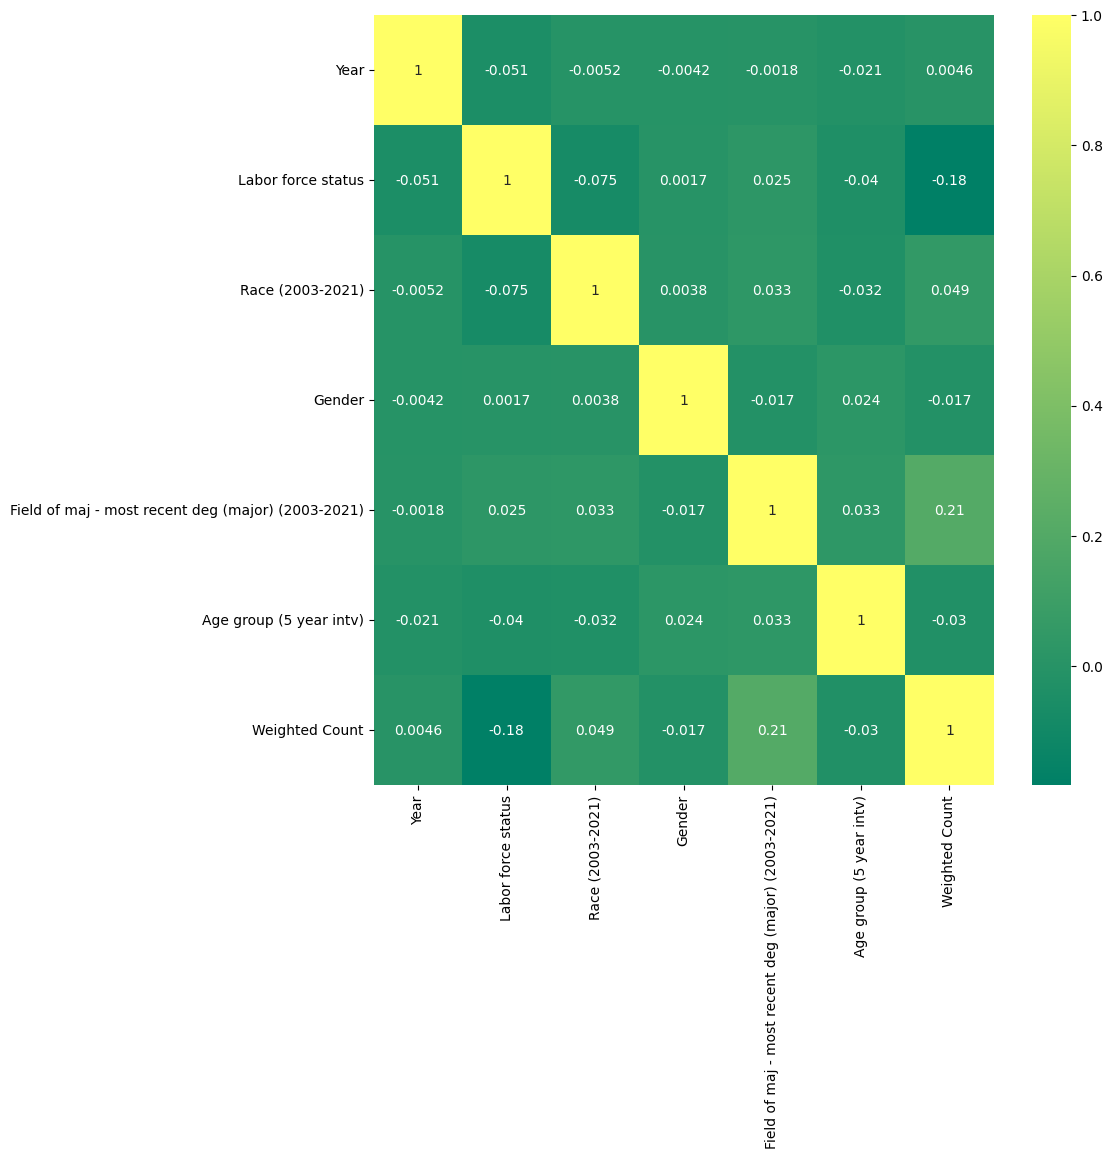

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(numeric_only=True),cmap="summer",annot=True)
plt.show()

## Classification for employment

In [24]:
X = df.drop(columns = 'Labor force status')
y = df['Labor force status']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=746, test_size=0.3)

### Logistic Regression 

In [26]:

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)


Accuracy: 68.99%
Confusion matrix:
 [[403  91]
 [149 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       494
           1       0.59      0.47      0.52       280

    accuracy                           0.69       774
   macro avg       0.66      0.64      0.65       774
weighted avg       0.68      0.69      0.68       774

AUC:  0.6418233082706767


c:\Users\pauli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes Classifier

In [27]:
print("----------Naive Bayes Classifier--------------\n")

#your code
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(f'Confusion matrix:\n {confusion_matrix(y_true=y_test,y_pred=y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test,y_pred)
print("AUC: ", roc_auc)

----------Naive Bayes Classifier--------------

Accuracy: 54.13%
Confusion matrix:
 [[151 343]
 [ 12 268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.31      0.46       494
           1       0.44      0.96      0.60       280

    accuracy                           0.54       774
   macro avg       0.68      0.63      0.53       774
weighted avg       0.75      0.54      0.51       774

AUC:  0.6314054366685946


### Analysis

Seems like Our models are really bad at predicting employment based on the demographics given